# A little project to learn statistics

## Table of Content:
0. [Intro: Imports and dotplot](#item-intro)
1. [Basics: How to build a histogramm](#item-basics)
2. [Measure of Central Tendency](#item-Central-Tendency)
    1. [Mean](#item-mean)
    2. [Median](#item-median)
    3. [Mode](#item-mode)
    4. [Dotplot](#item-dotplot)
3. [Measures of variability:](#item-variability)
    1. [Range](#item-range)
    2. [Variance](#item-variance)
    3. [Sigma and Standart deviation](#item-sigma-stdev)
    4. [Quartiles and boxplot](#item-boxplot)
5. [Normal Distribution](#item-normal-distribution)
    1. [Z-standartization](#item-z-standartization)
        1. [Z conversion table](#item-z-conversion-table)
6. [Central Limit Theorem(CLT)](#item-clt)
    1. [Confidence intervals](#item-confidence-intervals)
    2. [The idea of statistic conclusion. P-Value](#item-stat-conclusion-p-value)
7. [Student's T-Distribution](#item-t-distribution)
    1. [P-Value for T-Distribution](#item-t-pvalue)
    2. [T-Test](#item-t-test)
        1. [T-Test Requirenments](#item-t-test-requirenments)
            1. [Fisher's and Levene's criteria for equality of variances](#item-t-test-requirenments)
        2. [Plot of Confidence intervals](#item-confidence-intervals-plot)
8. [Check if a distribution is Normal](#item-check-if-a-normal-distribution)
    1. [QQ plot](#item-qq-plot)

[End of File](#item-end-of-file)

<a id="item-intro"></a>
## Intro:

In [71]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
import statsmodels.api as sm
from matplotlib import pyplot as plt

DataImport Class

In [72]:
class DataImport:
    def msk_import():
        datas = []
        for grade in range(7, 12):
            data = pd.read_csv(f'data\Moscow\MSK_{grade}grade.txt', 
                               sep="	",
                               header=None, 
                               on_bad_lines='skip')
            data.columns = ["Code", "Name", "GradeWritten", "Grade", "RegionCode", "Score", "Result"]
            datas.append(data)
        return ['0'] * 7 + datas #['0'] * 7 to make (msk[7] -> msk 7 grade table)

Dotplot func implementation

In [73]:
def dotplot(input_x, **args):
 
    # Count how many times does each value occur
    unique_values, counts = np.unique(input_x, return_counts=True)
    
    # Convert 1D input into 2D array
    scatter_x = [] # x values 
    scatter_y = [] # corresponding y values
    for idx, value in enumerate(unique_values):
        for counter in range(1, counts[idx]+1):
            scatter_x.append(value)
            scatter_y.append(counter)
 
    # draw dot plot using scatter() 
    plt.scatter(scatter_x, scatter_y, **args)
    
    # Optional - show all unique values on x-axis. 
    # Matplotlib might hide some of them  
    plt.gca().set_xticks(unique_values)

In [74]:
msk = DataImport.msk_import()

[Back to table of content](#Table-Of-Content)


<a id="item-basics"></a>
## Basics:

Take a random sample and
comparison of a sample and a general set with histogramm

Text(0.5, 1.0, 'Sample of scores')

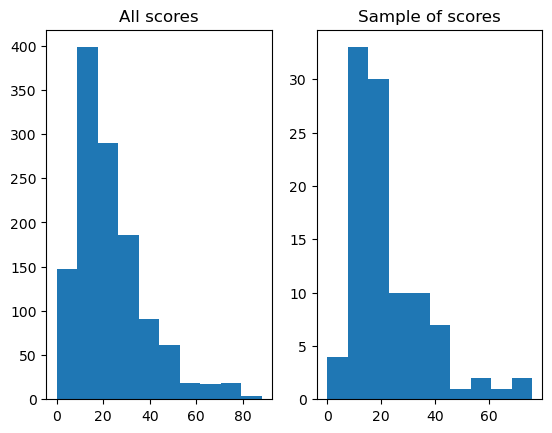

In [75]:
allScoresGrade7 = msk[7]['Score']
sampleOfScoresGrade7 = msk[7]['Score'].sample(n = 100)

fig, axs = plt.subplots(1, 2)
n_bins = 10
axs[0].hist(allScoresGrade7, bins=n_bins)
axs[0].set_title('All scores')
axs[1].hist(sampleOfScoresGrade7, bins=n_bins)
axs[1].set_title('Sample of scores')

## Implementations:

mskForAllGradesDo func implementation

In [76]:
def mskForAllGradesDo(fun, msk):
    for grade in range(7, 12):
        print(fun(msk[grade]["Score"]))

[Back to table of content](#Table-Of-Content)

<a id="item-Central-Tendency"></a>
## Measure of Central Tendency:

<a id="item-mean"></a>
### 1) Mean

In [77]:
mskForAllGradesDo(pd.Series.mean, msk)


23.147967479674797
25.71715721464465
32.849557522123895
40.064
42.78816568047337


### Mean features:
$$M_{x + c} = M_x + c$$
$$M_{x * c} = M_x * c$$
$$\sum(x_i-M_x)=0$$

<a id="item-median"></a>
### 2) Median

In [78]:
mskForAllGradesDo(pd.Series.median, msk)


20.0
20.0
20.0
36.0
32.0


<a id="item-mode"></a>
### 3) Mode

In [79]:
mskForAllGradesDo(pd.Series.mode, msk)


0    12
Name: Score, dtype: int64
0    16
Name: Score, dtype: int64
0    12
Name: Score, dtype: int64
0    72
Name: Score, dtype: int64
0    80
Name: Score, dtype: int64


<a id="item-dotplot"></a>
### 4) dotplot to show modes clearly

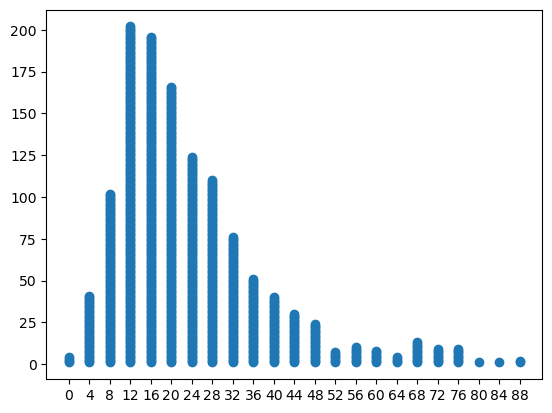

In [80]:
dotplot(msk[7]["Score"])

[Back to table of content](#Table-Of-Content)

<a id="item-variability"></a>
## Measures of variability:

<a id="item-range"></a>
### 1) Range
$$range = X_{max} - X_{min}$$

In [81]:
mskForAllGradesDo(lambda grades: max(grades) - min(grades), msk)

88
92
100
100
100


[Back to table of content](#Table-Of-Content)

<a id="item-variance"></a>
### 2) Variance(Дисперсия)
$$variance = D_x = \frac{\sum (x_i-\bar{x})^2}{n}$$
where:
$$\bar{x} = M_x$$

In [82]:
mskForAllGradesDo(pd.Series.var, msk)

208.22381604450828
249.25614938402808
731.1786524015031
763.4047684729168
917.126874000953


[Back to table of content](#Table-Of-Content)

<a id="item-sigma-stdev"></a>
### 3) Sigma ($\varsigma$) 
**Sigma** is a square root of **variance**(Dx) to equate the number of degrees(степень выражения) to one
$$pd.Series.std = \sqrt{pd.Series.var}$$ 
$$\varsigma = \sqrt{D_x}$$
Variance differences for sample and a general set to make a more approximate estimate.    
**for a sample**: 
$$D_x = \frac{\sum (x_i-\bar{x})^2}{n - 1}$$ 
$$sd = \sqrt{\frac{\sum (x_i-\bar{x})^2}{n - 1}}$$
**therefore for a general set:**
$$D_x = \frac{\sum (x_i-\bar{x})^2}{n}$$
$$\varsigma = \sqrt{\frac{\sum (x_i-\bar{x})^2}{n - 1}}$$

In [83]:
mskForAllGradesDo(lambda grades: math.sqrt(pd.Series.var(grades)), msk)
mskForAllGradesDo(pd.Series.std, msk)

14.429962440855773
15.787848155591949
27.040315316236665
27.629780463711917
30.284102661313128
14.429962440855773
15.787848155591949
27.040315316236665
27.629780463711917
30.284102661313128


#### Variance&STDev features:
$$D_{x + c} = D_x$$
$$sd_{x + c} = sd_x$$
$$D_{x * c} = D_x * c^2$$
$$sd_{x * c} = sd_x * c$$


[Back to table of content](#Table-Of-Content)

<a id="item-boxplot"></a>

### Quartile and boxplot

_A quartile is a type of quantile that divides a set of data into four equal parts. Each part represents 25% of the data. The first quartile (Q1) represents the 25th percentile, the second quartile (Q2) represents the 50th percentile (also known as the **median**), and the third quartile (Q3) represents the 75th percentile._    

_A **Boxplot** also called a **whisker plot**, is a data visualization technique that visualizes the distribution of data from the dataset provided. It separated the data into a 5-point summary which consists of the minimum point, the first quartile, the median, the third quartile, and the maximum point, with these it shows how data is distributed in a diagram. It can be said to give a summary of the data distribution or variation.

<Axes: >

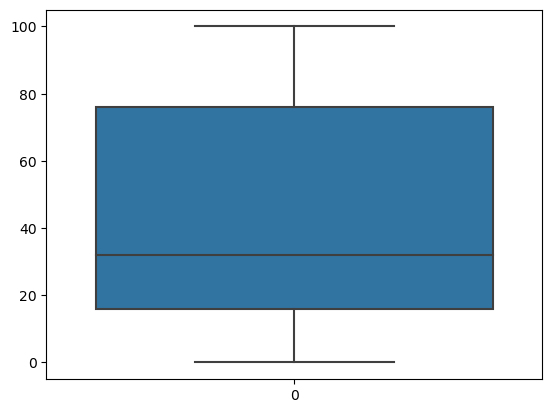

In [84]:
sns.boxplot(msk[11]["Score"])

[Back to table of content](#Table-Of-Content)

<a id="item-normal-distribution"></a>
## Normal distribution

* Unimodal (Single peak)
* **Symmetric** about the mean =-> Mean mode and median is always same
* follows the empiric rule: $f(x, M_x,\sigma) = 
\frac{1}{\sigma*\sqrt{2\pi}}*e^{-\frac{1}{2}(\frac{x-M_x}{\sigma})^2}$

<a id="item-z-standartization"></a>
### Z-Standartization
**Recipe:**
$$Z_i = \frac{x_i - \bar{x}}{\sigma x}$$
**Now it turns to:**
* $M_{xNew} = M_{xOld} - \bar{x}_{Old} = 0$
* $D_{xNew} = \frac{D_{xOld}}{(\sigma x)^2} = \frac{D_{xOld}}{D_{xOld}} = 1$
##### **3 $\sigma$ rule:**
* $M_x \pm 1 \sigma \approx 68.2 \%$
* $M_x \pm 2 \sigma \approx 95.4 \%$
* $M_x \pm 3 \sigma \approx 99.7 \%$   


<Axes: xlabel='Score', ylabel='Count'>

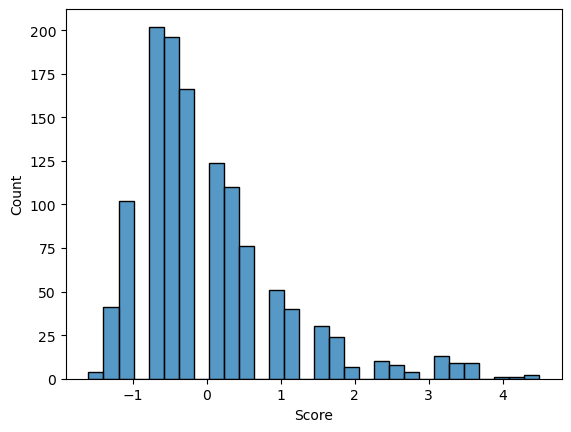

In [106]:
aSG7_Z_score = (allScoresGrade7 - allScoresGrade7.mean())/(allScoresGrade7.std()) # Z - standartization
aSG7_Z_Score = st.zscore(allScoresGrade7) #Does the same
sns.histplot(aSG7_Z_Score)

<a id="item-z-conversion-table"></a>
#### **Z conversion table**
If we need to know where the {x_i} is on the distribution, do:
$$z = \frac{x - \bar x}{sd} = 1,58$$
1.58 - in our example\
\
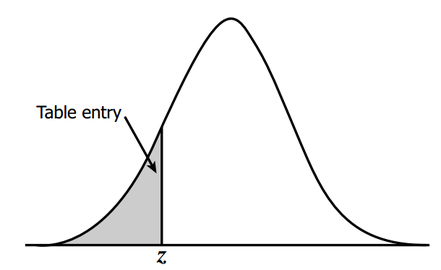
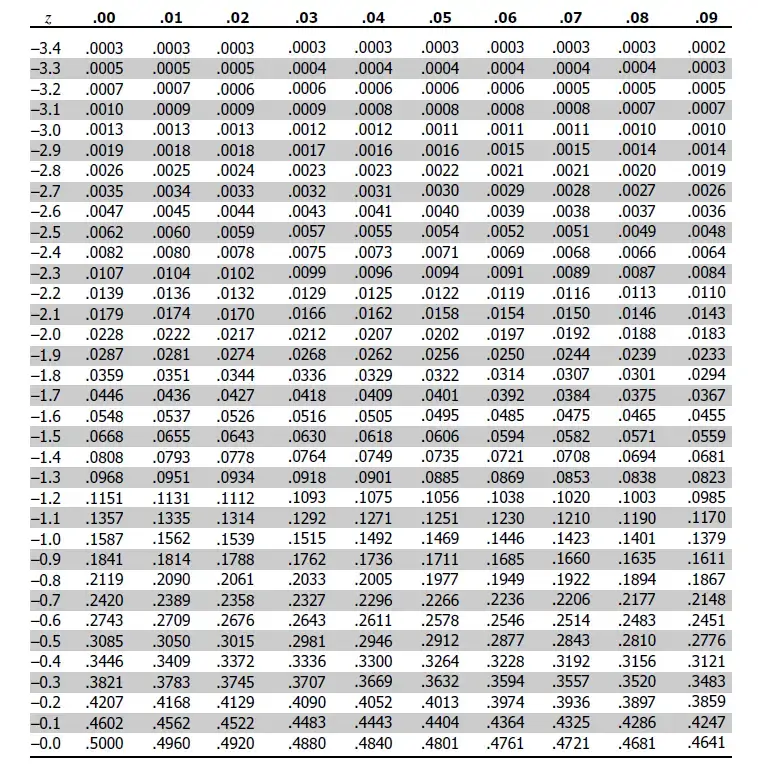\
According to the table we know that there are 5.71% of values those are bigger than x.\
Here is how to z-Standartizate our data:

Here is how to calculate percent this without a table:

In [127]:
st.norm.cdf(-1.58)

0.057053433237754185

for more info about that table see:\
[Calculating pvalue for z-distribution and t-distribution, cdf and ppf functions](#item-t-pvalue)

[Back to table of content](#Table-Of-Content)

<a id="item-clt"></a>
### Central Limit theorem
CLT states that for a n size random sample:
$$se(standart\ error) = \frac{\sigma}{\sqrt{n}} = \frac{sd_x}{\sqrt{n}} $$
* And all **means of samples** will produce a normal distribution with sd = se around Mx of a general set
##### For example:

Mean of Samples Means is 23.184, for general set it's 23.148
std of sample means is 1.386, 
therefore se(calculated by CLT Formula) is 1.342


<Axes: ylabel='Count'>

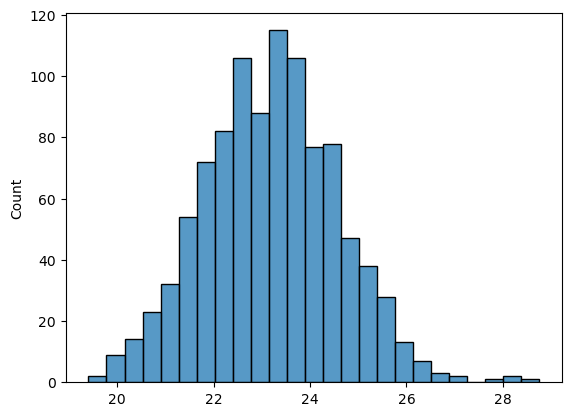

In [85]:
sampleSize = 100
howManySamples = 1000
allScoresGrade7 = msk[7]['Score']
allSG7_Mean = allScoresGrade7.mean()

# Let's produce a normal distribution with samples and
# check if CLT is true by calculating the sd and Mx of set of means we got

def getSample():
    global allScoresGrade7
    sampleOfScoresGrade7 = allScoresGrade7.sample(n = sampleSize)
    return sampleOfScoresGrade7

def calcSdForARandomSample():
    global allScoresGrade7
    sampleOfScoresGrade7 = allScoresGrade7.sample(n = sampleSize)
    return sampleOfScoresGrade7.std()

def calcSE():
    global sampleSize
    return calcSdForARandomSample() / math.sqrt(sampleSize)


meansOfSamples = []
for i in range(howManySamples):
    meansOfSamples.append(getSample().mean())

meansOfSamples = np.array(meansOfSamples)

print(f"Mean of Samples Means is {round(meansOfSamples.mean(), 3)}, for general set it\'s {round(allScoresGrade7.mean(), 3)}")
print(f'std of sample means is {round(meansOfSamples.std(), 3)}, \ntherefore se(calculated by CLT Formula) is {round(calcSE(), 3)}')
sns.histplot(meansOfSamples)



[Back to table of content](#Table-Of-Content)

<a id="item-confidence-intervals"></a>
#### And now for Confidence intervals:
We have a sample, n = 100, sd = 5, $\bar{x}$ = 3  
$se = \frac{5}{\sqrt{100}} = 0.5$ => All other samples:
* Are around some undefined {M_x} from general set
* And $M_x \in (\bar{x}-S*se;\bar{x}+S*se)$, where S = quantity of sigmas. If S = 2    
=>according to the rule of 3 sigmas=>    
=> Mx will in that interval with 95% probability
##### For example:

In [86]:
sampleSize = 100
allScoresGrade7 = msk[7]['Score']
S = 2
allSG7_Mean = allScoresGrade7.mean()
numOfSamples = 10000
    
'''
Let's predict the Mx with 95% probability(S = 2) using sample:
By next I will use SG7 as an abbreviation for ScoresGrade7
'''
def getSampleCalcInterval():
    global sampleSize, allScoresGrade7, allSG7_Mean
    
    #Getting a sample
    sampleOfScoresGrade7 = msk[7]['Score'].sample(n = sampleSize)
    
    #Calculating basic metrics
    sampleSG7_Mean = sampleOfScoresGrade7.mean()
    sampleSG7_Std = sampleOfScoresGrade7.std()
    sampleSG7_Se = sampleSG7_Std / math.sqrt(sampleSize)
    
    #Calculating the interval:
    allSG7_Mean_Min = sampleSG7_Mean - S * sampleSG7_Se
    allSG7_Mean_Max = sampleSG7_Mean + S * sampleSG7_Se
    
    #Check if Mx is in the interval
    return True if allSG7_Mean > allSG7_Mean_Min and allSG7_Mean < allSG7_Mean_Max else False

#Check for probability.
countOfValid = 0
for i in range(numOfSamples):
    if getSampleCalcInterval():
        countOfValid += 1

print(f"We got a probability of {countOfValid / 10000 * 100}%")

We got a probability of 95.15%


[Back to table of content](#Table-Of-Content)

<a id="item-stat-conclusion-p-value"></a>
## Idea of statistic conclusion, P-value
#### Example:
* We know that duratrion of recovery period is **Mx = 20** days for some disease
* We have a sample of **N = 64, $\bar{x} = 18,5$, sd = 4** for our drug(medicine)
* We want to check if our drug really reduces recovery period

Let's introduce a null-hypotesis:   
$H_0$: $M_{нп} = 20$ (нами полученное)   
$H_1$: $M_{нп} \neq 20$ 

Let's assume that the null hypothesis is true.   
By CLT:   
$$se = \frac{sd}{\sqrt{n}} = \frac{4}{\sqrt{64}} = 0,5$$   

Let's find out how many sigmas are between Mx and $\bar{x}$.   
Z - Standartization for $\bar{x}$:
$$ Z = \frac{\bar{x} - M_x}{se} = \frac{18,5 - 20}{0,5} = -3$$  
We got that if $H_0$ is true:   
**$\bar{x}$ is 3 sigmas away from Mx**    
That means that $H_0$ is true with <0,07% probability   
And $H_1$ is 99% correct. Our drug is really effective!

* Confidence intervals are better than p-value but still not a panacea

[Back to table of content](#Table-Of-Content)

<a id="item-t-distribution"></a>
## Student's Distribution (T-Distribution)

* if the number of observations is small and $\sigma$ is undefined, we almost always use t-distribution
* t-distribution is unimodal and symmetric but observes goes out of $\pm 2 \sigma$ of Mean more likely:
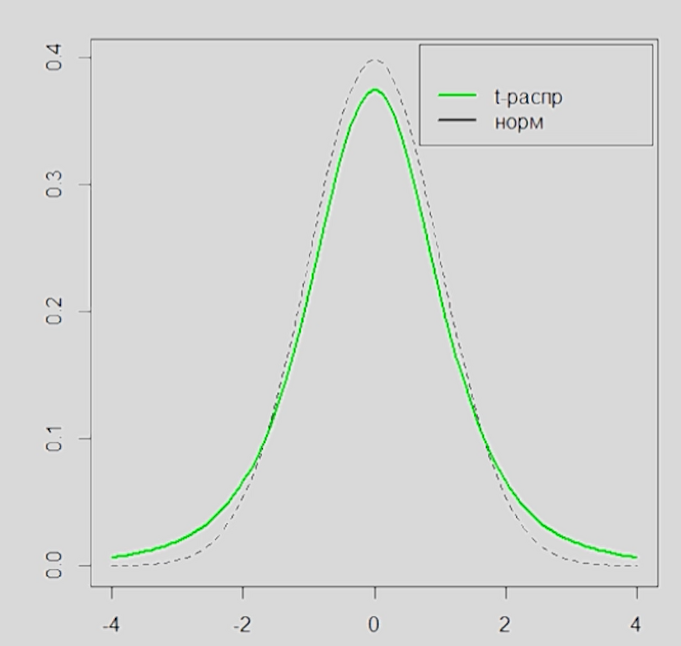
* Distribution is defined by the number of freedom degrees (df = n - 1). 
* As the df increases, the distribution tends to be normal.
* df = 30 => t-distribution is almost like a normal distribution.

#### Example:
##### By Z - standartization:
* We know: $M_x = 10$
* We have: $\bar{x} = 10,8$, $sd = 2$, $N = 25$.   
##### Z - standartization:
$$se = \frac{sd}{\sqrt{n}} = \frac{2}{5} = 0,4$$   
$$Z = \frac{\bar{x} - M_x}{se} = \frac{10,8 - 10}{0,4} = 2$$
    
Let's find out the probability of this deviation:   
We'll use this site https://gallery.shinyapps.io/dist_calc/. It does some integral formulas.    

Based on the assumption that all samples are distributed normal:   
$$p = 0,04599 < 0,05$$
For t-distribution:
$$p = 0.05694 > 0,05$$
It varies. That means that we should definitelly use t-distribution.

What does that calculator in python:

In [87]:
def t_pValue(t, n, area='bt'):
	df = n - 1

	if area == 'bt': # both tales
		p = 2 * (1 - st.t.cdf(abs(t), df))

	if area == 'lt': # lower tail
		p = st.t.cdf(t, df)

	if area == 'ut': #upper tail
		p = 1 - st.t.cdf(t, df)

	return p

def norm_pValue(z, area='bt'):
	if area == 'bt': # both tales
		p = 2 * (1 - st.norm.cdf(abs(t)))

	if area == 'lt': # lower tail
		p = st.norm.cdf(t)

	if area == 'ut': #upper tail
		p = 1 - st.norm.cdf(t)

	return p

t = 2
n = 25
print(round(norm_pValue(t), 5))
print(round(t_pValue(t, n), 5))

0.0455
0.05694


[Back to table of content](#Table-Of-Content)

<a id="item-t-pvalue"></a>
Code explanation:    
**st.t.cdf** and **st.norm.cdf** calculate the area under the curve of the t-distribution and the normal distribution, respectively, UP to the value of the number of deviations z (in our case two).   


* st.t.ppf and st.norm.ppf **is the inverse** of st.t.cdf and st.norm.cdf respectively. It returns the number of deviations.\
Example: 

In [132]:
z = 2
cdf = round(st.norm.cdf(z), 5)
ppf = round(st.norm.ppf(cdf))
print(f'st.norm.cdf({z}) returns {cdf}')
print(f'st.norm.ppf({cdf}) returns {ppf}')

st.norm.cdf(2) returns 0.97725
st.norm.ppf(0.97725) returns 2


<a id="item-t-test"></a>
### Student t-test

#### Example:
We have two samples. Given:
* $x_1$, $sd_1$, $n_1$
* $x_2$, $sd_2$, $n_2$   
Introduce a hypotesis:
* $H_0$: In general set $M_1 = M_2$
* $H_0$: In general set $M_1 \neq M_2$\
If we repeat the experiment many times:\
Distribution that defined as $a = \bar{x_1} - \bar{x_2}$ is:
* Unimodal and symmetric
* $M_1 - M_2 = 0$
* And will have $sd = \sqrt{se_1^2 + se_2^2} = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}}$\
This is a t-distribution with $df = df_1 + df_2 = n_1 + n_2 - 2$
#### Now for a T-Test:
$$t = \frac{(\bar{x_1} - \bar{x_2}) - (M_1 - M_2)}{\sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}}}$$
And!!! $M_1 - M_2 = 0$ for $H_0$ in that case.   
We know df and t => We can calculate the P - value.
##### Example:
Metal manufacturers in Russia have noticed that two different metals of the same alloy(сплав) from Russia and from China have different melting points.

In comparison of the two types of metals, the following differences in the average melting temperature of the metal were obtained:
| |Mx|SD|N|
|------|----|----|--|
|China|89,9|11,3|20|
|Russia|80,7|11,7|20|
Check if this difference is statistically significant or no.
Introduce the hypotesis:
* $H_0$:   $M_1 = M_2$
* $H_1$:   $M_1 \neq M_2$\
Let's assume that the $H_0$ is true:
$$t = \frac{89,9 - 80,7}{\sqrt{\frac{11,3^2}{20} + \frac{11,7^2}{20}}} = 2,53$$


In [121]:
print(f'The p-value is {round(t_pValue(2.53, 20), 5)} < 0.05, so the null hypotesis is false.')

The p-value is 0.02041 < 0.05, so the null hypotesis is false.


[Back to table of content](#Table-Of-Content)

<a id="item-confidence-intervals-plot"></a>
To make the statistics representative, **let's use boxplot and graph of confidence intervals**.\
This is a code made by some listeners of my course:

C:\Users\xd\AppData\Local\Temp\ipykernel_15800\1161768697.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\


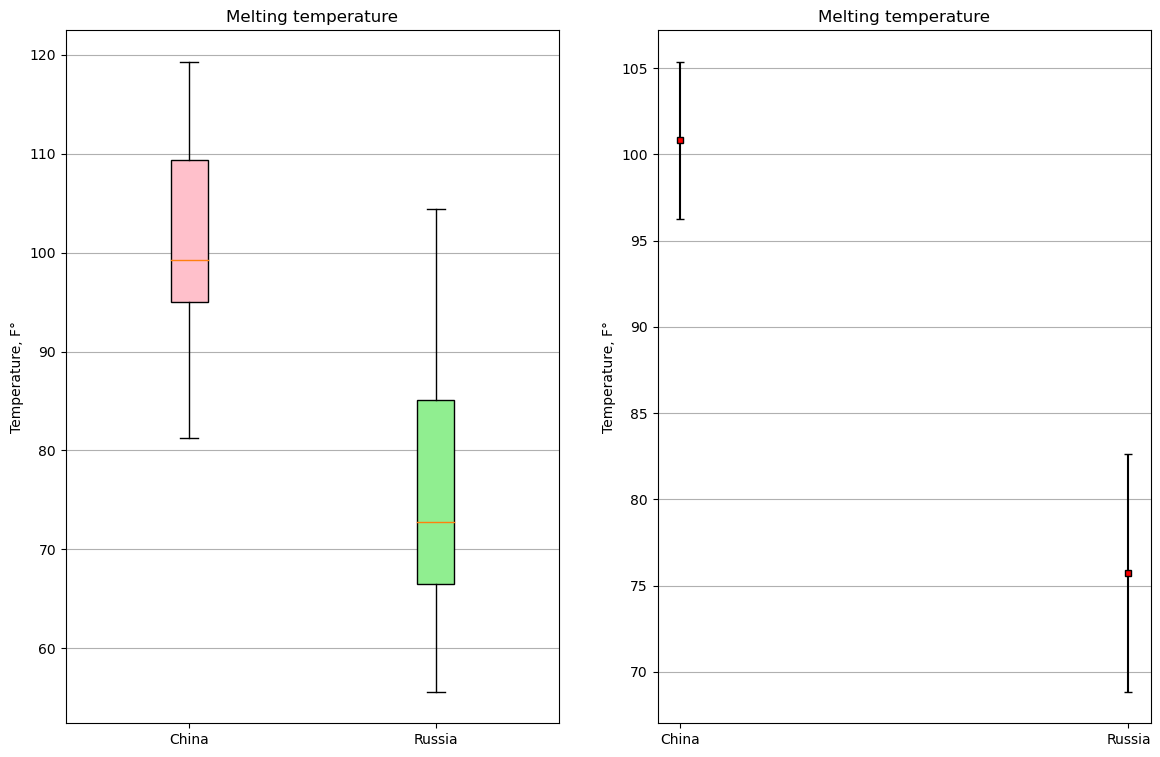

In [91]:
array1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
array2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]

# Basic statistics
df = pd.DataFrame({'China':array1, 'Russia':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# Counting the 95% confidence interval:
p = 0.95
K = st.t.ppf((1 + p)/2, df['Mx']-1)
df['interval'] = K * df['SE']

# all plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # makes vertical boxes
                     patch_artist=True, # fill with color quantile boxes
                     labels=['China', 'Russia'])

# confidence intervals plot
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# fill with color boxplot
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# add names for both plots:
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Melting temperature')
    ax.set_ylabel('Temperature, F°')
    
plt.show()

[Back to table of content](#Table-Of-Content)

<a id="item-t-test-requirenments"></a>
#### What do we need to use T-test?:
* Dispersions of our samples should be close to each other. \
We can check it using the Fisher's criteria or Levene's criteria:

In [ ]:
#F-test (Fisher's criteria for equality of variances)
var1 = np.var(array1)
var2 = np.var(array2)
F = (var1 ** 2) / (var2 ** 2)
print(f"F = {round(F,5)}\nFisher\'s p-value > 0,05 so in previous example we can\'t reject the H0")

F = 0.19305
Fisher's p-value > 0,05 so in previous example we can't reject the H0


In [ ]:
print(st.levene(array1, array2))
print('levene\'s p-value > 0,05 so in previous example we can\'t reject the H0')

LeveneResult(statistic=3.0323815305373025, pvalue=0.0897095081715606)
levene's p-value > 0,05 so in previous example we can't reject the H0


* If n < 30 we should check that samples are distributed normal.

[Back to table of content](#Table-Of-Content)

<a id="item-check-if-a-normal-distribution"></a>
### Check if sample is a normal disrtibution:
<a id="item-qq-plot"></a>
#### QQ - plot:
Definition: A Q–Q plot is a plot of the quantiles of two distributions against each other, or a plot based on estimates of the quantiles. The pattern of points in the plot is used to compare the two distributions.\
##### Example:

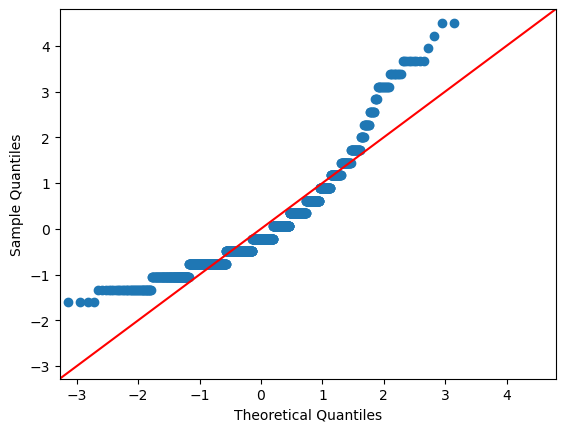

<Axes: xlabel='Score', ylabel='Count'>

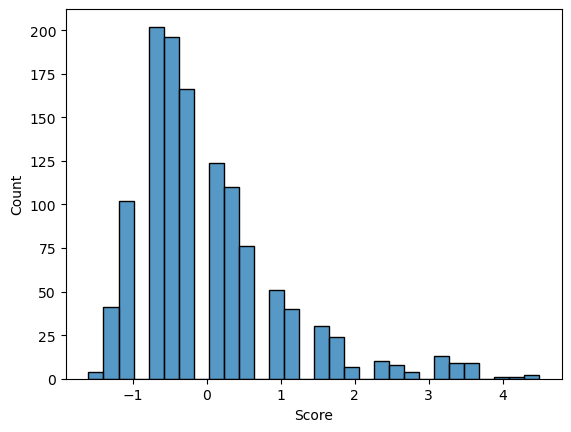

In [105]:
allScoresGrade7 = (allScoresGrade7 - allScoresGrade7.mean())/(allScoresGrade7.std()) # Z - standartization
allScoresGrade7 = st.zscore(allScoresGrade7) #Does the same
fig = sm.qqplot(allScoresGrade7, line='45')
plt.show()
sns.histplot(allScoresGrade7)

<a id="item-end-of-file"></a>
[Back to table of content](#Table-Of-Content)